In [158]:
import numpy
import torch
import typing

In [159]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")

using device: cuda:0


In [160]:
import handleDatas
import train
import moe_model
import basicModels

def cell():
    global handleDatas, train, moe_model, basicModels
    import importlib
    handleDatas = importlib.reload(handleDatas)
    train = importlib.reload(train)
    moe_model = importlib.reload(moe_model)
    basicModels = importlib.reload(basicModels)

cell();

In [169]:
datashandler = handleDatas.Cifar10_Datas(
    fromTrainSource=True, maxSamples=None, trainProp=0.8, classesOffset=0,
    batchSizeTrain=32, batchSizeTest=64)

loaded FashionMNIST(total: 50000), train: 40000 [1250 batches] | test: 10000 [157 batches]


In [170]:
model, optim, loss = basicModels.BasicImageClassifModel.get_Cifar10(device=device, modelConfig="large")
hist = train.HistoryClassification()
basicModels.countLayersparameters(model)

# test the model
_ = model(datashandler.full_dataset[0]['image'].to(device))

+----------------------+------------+
|       Modules        | Parameters |
+----------------------+------------+
| CNN_block1.0.weight  |   1_728    |
| CNN_block2.0.weight  |   73_728   |
| CNN_block2.1.weight  |    128     |
|  CNN_block2.1.bias   |    128     |
| CNN_block3.0.weight  |  147_456   |
| CNN_block4.0.weight  |  147_456   |
| CNN_block5.0.weight  |  294_912   |
| CNN_block6.0.weight  | 1_179_648  |
| CNN_block6.1.weight  |    512     |
|  CNN_block6.1.bias   |    512     |
| outputBlock.2.weight |   81_920   |
|  outputBlock.2.bias  |     10     |
+----------------------+------------+
Total Trainable Params: 1_928_138


In [171]:
train.train_model_classif(
    model=model, optimizer=optim, criterion=loss, device=device,
    datasHandler=datashandler, nbEpoches=10, history=hist);

Epoch 1, train: (loss: 1.835, accuracy: 37.55%), test: (loss: 1.39, accuracy: 50.79%), lr: 1.0000e-03
Epoch 2, train: (loss: 1.172, accuracy: 58.70%), test: (loss: 1.065, accuracy: 63.01%), lr: 1.0000e-03
Epoch 3, train: (loss: 0.926, accuracy: 67.76%), test: (loss: 0.835, accuracy: 70.52%), lr: 1.0000e-03
Epoch 4, train: (loss: 0.7635, accuracy: 73.67%), test: (loss: 0.7775, accuracy: 73.27%), lr: 1.0000e-03
Epoch 5, train: (loss: 0.6569, accuracy: 77.59%), test: (loss: 0.7403, accuracy: 75.12%), lr: 1.0000e-03
Epoch 6, train: (loss: 0.5587, accuracy: 80.90%), test: (loss: 0.6879, accuracy: 76.11%), lr: 1.0000e-03
Epoch 7, train: (loss: 0.4841, accuracy: 83.47%), test: (loss: 0.6936, accuracy: 77.09%), lr: 1.0000e-03
Epoch 8, train: (loss: 0.4087, accuracy: 85.93%), test: (loss: 0.7034, accuracy: 77.20%), lr: 1.0000e-03
Epoch 9, train: (loss: 0.3434, accuracy: 88.12%), test: (loss: 0.6781, accuracy: 77.96%), lr: 1.0000e-03
Epoch 10, train: (loss: 0.2854, accuracy: 90.16%), test: (loss

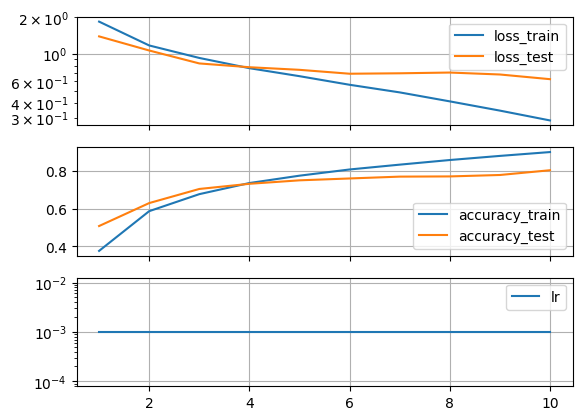

In [172]:
hist.plot();